# Parametric Spline

In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import math

## Display Nickname

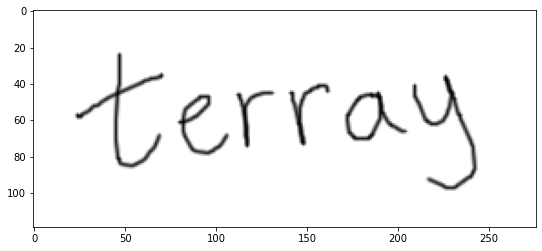

In [2]:
# Read in the nickname image
f = plt.imread('terray.png')

# Plot the image
plt.figure(figsize=(9,5)); plt.imshow(f);

## Interpolation Points

In [3]:
# The x coordinates for each segment
# Each array inside the variable represents a segment
x = [
    [24.63, 45.99, 69.34],
    [47.18, 46.39, 55.89, 68.15],
    [82.4, 93.08, 96.25, 86.75, 82.0, 83.98, 95.46, 105.35],
    [112.87, 116.03, 116.82, 116.43, 116.04, 121.97, 131.47],
    [141.36, 144.92, 148.08, 144.92, 150.46, 161.14],
    [189.63, 179.35, 172.22, 177.76, 188.05, 190.03, 194.38, 204.27],
    [209.02, 216.94, 226.83, 229.99, 226.43, 242.26, 236.33, 217.73]
]

# The corresponding y coordinates for each segment
# Each array inside the variable represents a segment
y = [
    [57.22, 44.95, 35.06],
    [24.38, 81.75, 83.73, 68.3],
    [60.78, 54.45, 46.93, 50.49, 59.99, 70.67, 77.4, 68.69],
    [46.54, 58.41, 73.05, 65.13, 52.87, 46.54, 44.95],
    [45.35, 57.22, 71.46, 56.82, 43.77, 43.37],
    [46.93, 47.33, 58.01, 69.88, 62.76, 47.33, 59.59, 65.92],
    [41.39, 61.18, 56.82, 46.54, 37.04, 80.57, 94.02, 92.83]
]

## Parametric Spline Implementation

In [4]:
def ParametricSpline(Sx,Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.
       
       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''
    # Initialize t to be array of zeros
    t = np.zeros_like(Sx)
    
    # Compute values for t using the pseudo-arclength formula
    # Since t[0] = 0, we skip the first entry in t
    for i in range(1, len(Sx)):
        t[i] = t[i - 1] + math.sqrt((Sx[i] - Sx[i - 1]) ** 2 + (Sy[i] - Sy[i - 1]) ** 2)
        
    # Create x(t)
    x_cs = make_interp_spline(t, Sx, bc_type='natural') 
    
    # Create y(t)
    y_cs = make_interp_spline(t, Sy, bc_type='natural')

    # Return the functions and parameter values
    return x_cs, y_cs, t

## Find Splines for Each Segment

In [5]:
# Compute x(t), y(t), and t for each of the segments
segments = [
    ParametricSpline(seg_x, seg_y) for seg_x, seg_y in zip(x, y)
]

## Plot the Segments

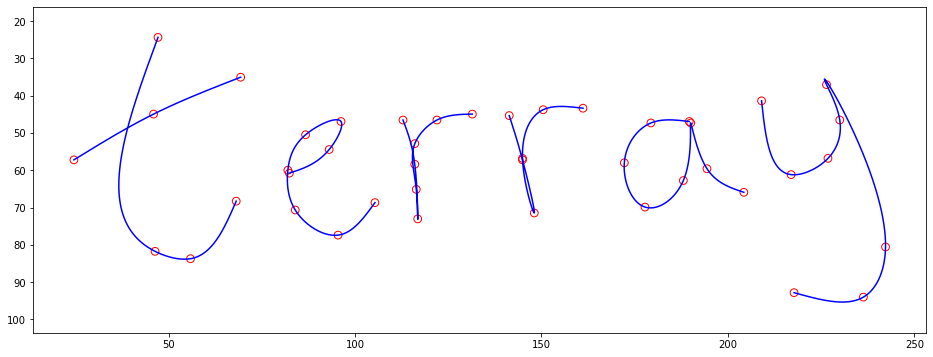

In [6]:
# Set figure size
plt.figure(figsize=(16,6))

# Set equal axis scale
plt.axis('equal')

# Invert y axis (since our image has coordinate (0, 0) at top left, the
# data points collected using ginput will be relative to that position)
plt.gca().invert_yaxis()

# Iterate through each segment
for index, (x_cs, y_cs, t) in enumerate(segments):
    # Get the corresponding segment x values
    seg_x = x[index]
    
    # Get the corresponding segment y values
    seg_y = y[index]
    
    # Segments should have 1000 points each
    tt = np.linspace(t[0], t[-1], 1000)
    
    # Plot the segment with color blue
    plt.plot(x_cs(tt), y_cs(tt), 'b')
    
    # Scatter plot the original interpolation points on top
    plt.scatter(seg_x, seg_y, s=60, facecolors='none', edgecolors='r')